In this project I wanted to look at video game sales over years and see if I can find patterns in genres, platforms, and companies. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('csv_files/video_games_sales.csv')
sales_df = pd.read_csv('csv_files/Video_Games_Sales_as_at_22_Dec_2016.csv')

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Here I am just getting a basic layout of the dataframe to get a general idea of what data I am working with.

In [3]:
df.shape

(16598, 11)

In [4]:
sales_df.shape

(16719, 16)

In [5]:
sales_df.duplicated().sum()

np.int64(0)

In [6]:
df.value_counts()

Rank   Name                                              Platform  Year    Genre         Publisher   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
1      Wii Sports                                        Wii       2006.0  Sports        Nintendo    41.49     29.02     3.77      8.46         82.74           1
2      Super Mario Bros.                                 NES       1985.0  Platform      Nintendo    29.08     3.58      6.81      0.77         40.24           1
3      Mario Kart Wii                                    Wii       2008.0  Racing        Nintendo    15.85     12.88     3.79      3.31         35.82           1
4      Wii Sports Resort                                 Wii       2009.0  Sports        Nintendo    15.75     11.01     3.28      2.96         33.00           1
5      Pokemon Red/Pokemon Blue                          GB        1996.0  Role-Playing  Nintendo    11.27     8.89      10.22     1.00         31.37           1
                                 

In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
df.duplicated().sum()

np.int64(0)

Gathering information on my data frames, such as if anything is duplicated, and to get some general information like the length of the table. 

In [9]:
df.isna()

df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
df['Publisher'].fillna('', inplace=True)

df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Checking if the columns have any NA values and filling them in under the Publisher column. As it doesn't have that many NA values compared to the total length of the dataframe.

In [11]:
df2 = df.set_index('Publisher')

df2.loc['Nintendo'].sort_values('Year')

,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,,,,
Nintendo,765,Mahjong,NES,1983.0,Misc,0.01,0.00,2.13,0.00,2.14
Nintendo,422,Baseball,NES,1983.0,Sports,0.73,0.10,2.35,0.02,3.20
Nintendo,1863,Popeye,NES,1983.0,Platform,0.51,0.12,0.45,0.02,1.10
Nintendo,1811,Donkey Kong,NES,1983.0,Platform,0.23,0.05,0.84,0.01,1.13
Nintendo,702,Mario Bros.,NES,1983.0,Platform,0.51,0.12,1.63,0.02,2.28
...,...,...,...,...,...,...,...,...,...,...
Nintendo,5510,Custom Robo,N64,NaN,Role-Playing,0.00,0.00,0.29,0.04,0.33
Nintendo,11411,Zero: Tsukihami no Kamen,Wii,NaN,Action,0.00,0.00,0.08,0.00,0.08
Nintendo,15000,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,0.00,0.00,0.02,0.00,0.02


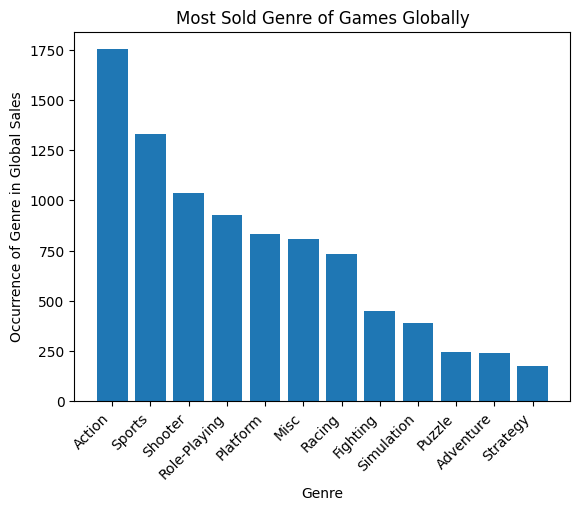

In [12]:
genre_df = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
plt.bar(genre_df.index, genre_df.values)
plt.xticks(rotation=45, ha='right')
plt.title('Most Sold Genre of Games Globally')
plt.xlabel('Genre')
plt.ylabel('Occurrence of Genre in Global Sales')
plt.show()

I wanted to use a bar chart to show a comparison of the genres and how many times they occurred in the top sales over the years. As you can see Action, Sports, and Shooter game genres are the top games globally

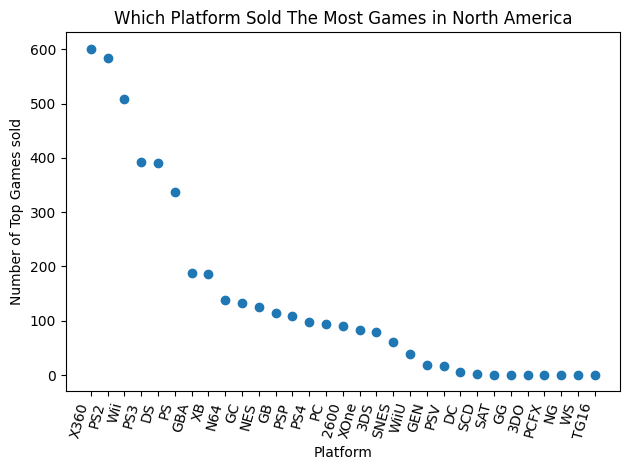

In [13]:
df.columns

df_platform = df.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=False)

plt.scatter(df_platform.index, df_platform.values)
plt.xticks(rotation=75, ha='right')
plt.xlabel('Platform')
plt.ylabel('Number of Top Games sold')
plt.title('Which Platform Sold The Most Games in North America')

plt.tight_layout()
plt.show()

I was curious which platforms performed the best in North America. Overall the Xbox360, PS2, and Wii seemed to be the front runners over the years.

In [14]:
sales_df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [15]:
sales_df.rename(columns={'Year_of_Release' : 'Year'}, inplace=True)

At this point I added my second dataframe. Checking what columns it had I renamed the Year_of_Release column to Year to better match my original dataframe. Doing this allowed me to merge the two easier. 

In [16]:
combined_df = sales_df.merge(df, how='inner')

combined_df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Rank
0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,2
1,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,5
2,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN,6
3,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN,10
4,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,NaN,NaN,NaN,NaN,NaN,NaN,13


In [17]:
combined_df.shape

(11707, 17)

In [18]:
combined_df.isna().sum()

Name               0
Platform           0
Year             177
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    6725
Critic_Count    6725
User_Score      7358
User_Count      7358
Developer       5634
Rating          5712
Rank               0
dtype: int64

In [19]:
combined_df.duplicated().sum()

np.int64(0)

Doing some checks after merging the columns together, such as if anything is duplicated or na. There are a lot of NA and it would skew my results depending on how I fill them in.

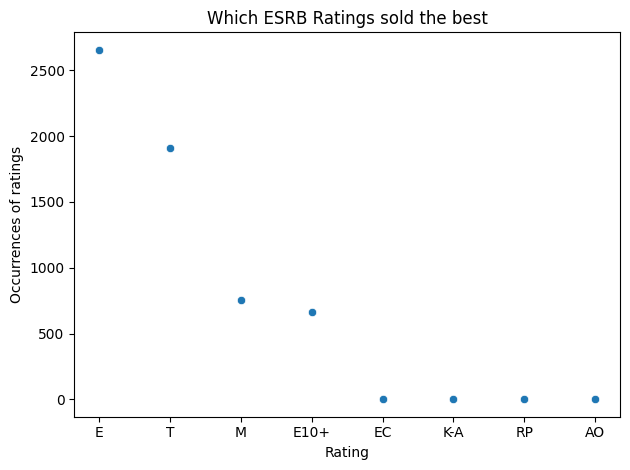

In [40]:
rating_series = combined_df['Rating'].value_counts().sort_values(ascending=False)

sns.scatterplot(rating_series)
plt.title('Which ESRB Ratings sold the best')
plt.ylabel('Occurrences of ratings')

plt.tight_layout()

Looking at what ESRB ratings are the top sellers in this chart. We can see that Rated E for Everyone, and T for Teen are the leaders over the years.

In [22]:

corr_df = combined_df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rank']].corr()


corr_df

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rank
Year,1.000000,-0.222100,-0.176262,-0.231718,-0.039949,-0.244865,-0.170641,0.106789,-0.283657,0.037442,0.411387
NA_Sales,-0.222100,1.000000,0.642770,0.431360,0.358662,0.927801,0.319622,0.261455,0.183372,0.205094,-0.413279
EU_Sales,-0.176262,0.642770,1.000000,0.427859,0.346587,0.799287,0.257928,0.170457,0.160078,0.133527,-0.440265
JP_Sales,-0.231718,0.431360,0.427859,1.000000,0.153243,0.653911,0.180587,0.112321,0.149193,0.133637,-0.310916
Other_Sales,-0.039949,0.358662,0.346587,0.153243,1.000000,0.483227,0.140741,0.136699,0.077467,0.118196,-0.259672
Global_Sales,-0.244865,0.927801,0.799287,0.653911,0.483227,1.000000,0.317121,0.245096,0.194279,0.204346,-0.477604
Critic_Score,-0.170641,0.319622,0.257928,0.180587,0.140741,0.317121,1.000000,0.382458,0.631141,0.212331,-0.343605
Critic_Count,0.106789,0.261455,0.170457,0.112321,0.136699,0.245096,0.382458,1.000000,0.208932,0.268418,-0.309238
User_Score,-0.283657,0.183372,0.160078,0.149193,0.077467,0.194279,0.631141,0.208932,1.000000,0.091344,-0.232906
User_Count,0.037442,0.205094,0.133527,0.133637,0.118196,0.204346,0.212331,0.268418,0.091344,1.000000,-0.056860


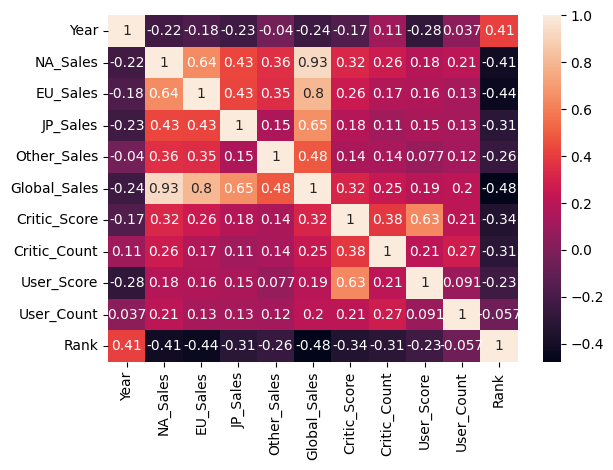

In [24]:
sns.heatmap(corr_df, annot=True)

plt.tight_layout()

Looking at correlations between the quanitative data available in the dataframe.

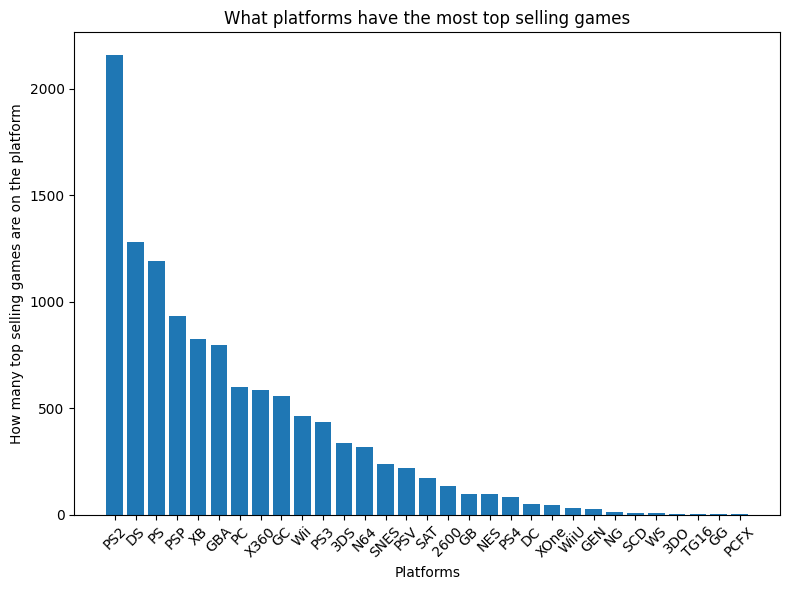

In [38]:
plat_df = combined_df['Platform'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(plat_df.index, plat_df.values)
plt.xticks(rotation=45)
plt.xlabel('Platforms')
plt.ylabel('How many top selling games are on the platform')
plt.title('What platforms have the most top selling games')

plt.tight_layout()
plt.show()

Checking what platform or console had the most top games sold. In this bar chart it shows that PS2 and DS are the front runners.

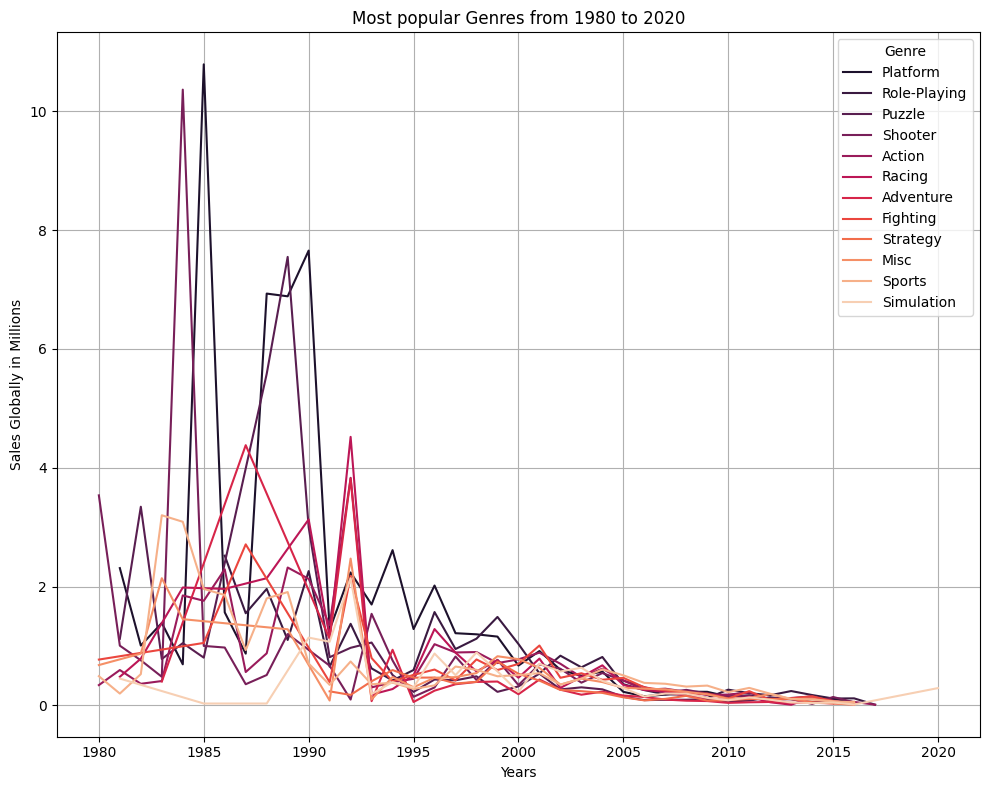

In [26]:
multi_line = combined_df[['Genre', 'Year', 'Global_Sales', 'Publisher']]

plt.figure(figsize=(10,8))
sns.lineplot(x='Year', y='Global_Sales', hue='Genre', data=multi_line, errorbar=None, palette='rocket')
plt.title('Most popular Genres from 1980 to 2020')
plt.ylabel('Sales Globally in Millions')
plt.xlabel('Years')
plt.grid()

plt.tight_layout()

Checking what Genres were most popular over the years. Platform and Shooter games were very popular in 1980s-1990s. Then Action and Adventure picked up some traction. 

In [27]:
filtered_multi_line = multi_line[multi_line['Publisher'].isin([
    'Electronic Arts', 'Namco Bandai Games', 'Konami Digital Entertainment',
      'Activision', 'Sony Computer Entertainment', 'Ubisoft',
      'THQ', 'Sega', 'Nintendo', 'Atari'])]

grouped_df = filtered_multi_line.groupby(['Year', 'Genre', 'Publisher'])['Global_Sales'].sum()
grouped_df = pd.DataFrame(grouped_df)

grouped_df

Global_Sales
Year   Genre        Publisher                                 
1980.0 Action       Activision                            0.34
       Fighting     Activision                            0.77
       Misc         Activision                            1.42
                    Atari                                 1.29
       Shooter      Atari                                 7.07
...                                                        ...
2016.0 Shooter      Electronic Arts                       0.05
       Simulation   Atari                                 0.02
       Sports       Konami Digital Entertainment          0.17
2017.0 Role-Playing Sega                                  0.01
2020.0 Simulation   Ubisoft                               0.29

[1592 rows x 1 columns]

In [44]:
combined_df['Publisher'].value_counts().head(10)

Publisher
Electronic Arts                 848
Namco Bandai Games              743
Konami Digital Entertainment    694
Activision                      551
Sony Computer Entertainment     504
Ubisoft                         495
THQ                             493
Sega                            460
Nintendo                        445
Atari                           310
Name: count, dtype: int64

Finding the top 10 most popular publishers 

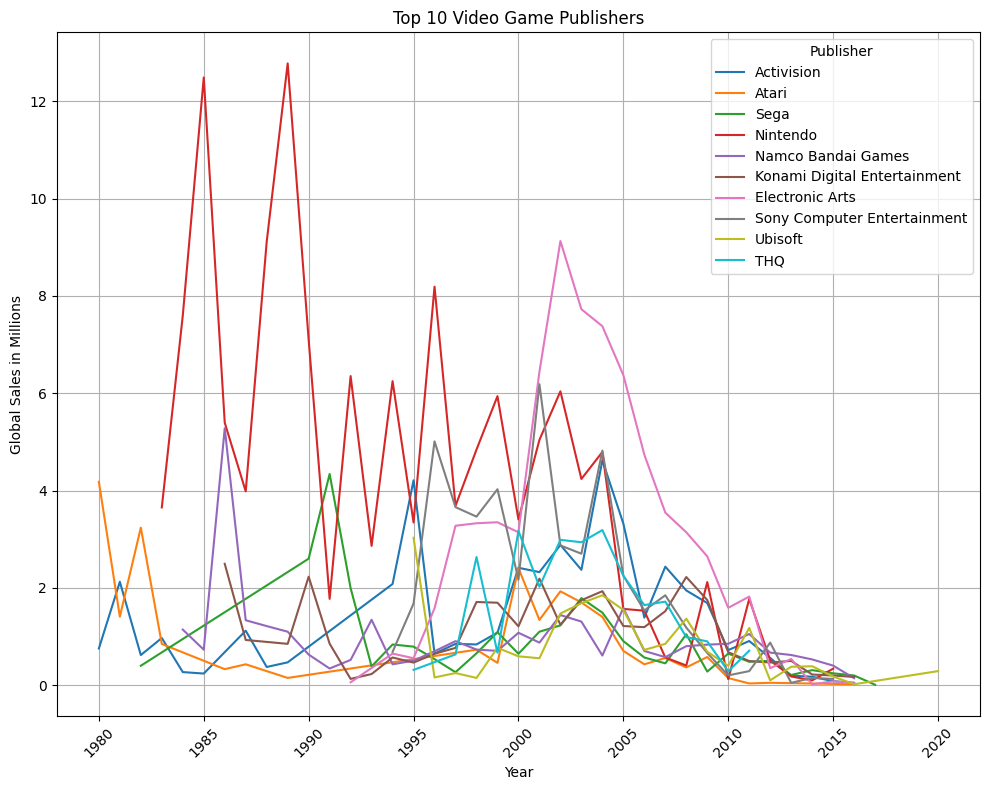

In [41]:

plt.figure(figsize=(10,8))
sns.lineplot(x='Year', y='Global_Sales', hue='Publisher', data=grouped_df, errorbar=None)

plt.grid()
plt.xticks(rotation=45)
plt.title('Top 10 Video Game Publishers')
plt.ylabel('Global Sales in Millions')

plt.tight_layout()

Here I am looking at the top 10 Publishers over the years. Nintendo looks to be the most popular publisher early on followed by Electronic Arts after the 2000s.